In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

%matplotlib inline

In [2]:
#nltk.download('punkt')

In [3]:
data = pd.read_csv("output_merged_25oct.csv", encoding='latin-1')
data.head()

,COMPANY,COUNTRY,DISTRIBUTOR,ARTICLE ID,MODEL NUMBER,ARTICLE NAME,SUBBRAND,SPORTS CATEGORY,PRODUCT DIVISION,PRODUCT GROUP,...,CURRENT PRICE IN EUR,INITIAL PRICE IN SELECTED CURRENCY,CURRENT PRICE IN SELECTED CURRENCY,SELECTED CURRENCY,PRODUCT INTRODUCTION DATE,DISCOUNTED SINCE,PRODUCT EXIT DATE,PRODUCT DESCRIPTION,PRODUCT URL,IMAGE-SERVER URL
0,Nike,USA,Own eCom,837786-603,837786,KD 8 'Aunt Pearl' Premium Big Kids' Basketball...,Performance,Basketball,Footwear,Performance Footwear,...,56.5239,121.80,56.5239,EUR,2/29/2016,11/9/2016,9/18/2017,DYNAMIC VERSATILITY. INSPIRED STYLE.; The KD 8...,https://store.nike.com/us/en_us/pd/kd-8-aunt-p...,http://usporamap287.am.adsint.biz/zoomimages/1...
1,Nike,USA,Own eCom,810455-421,810455,LeBron 13 Transportation Kids' Adjustable Hat,Sport Inspired,Lifestyle,Accessories,Headwear,...,17.3739,24.36,17.3739,EUR,2/29/2016,4/4/2016,5/2/2016,LEBRON TRANSPORTATION HAT The LeBron 13 Transp...,http://store.nike.com/us/en_us/pd/lebron-13-tr...,http://usporamap287.am.adsint.biz/zoomimages/1...
2,Nike,USA,Own eCom,807940-010,807940,Nike SB Cherry Blossom Perforated Trucker Hat,Sport Inspired,Skate,Accessories,Headwear,...,27.8400,27.84,27.8400,EUR,2/29/2016,Not discounted yet,3/21/2016,BREATHABLE COMFORT The Nike SB Cherry Blossom ...,http://store.nike.com/us/en_us/pd/sb-cherry-bl...,http://usporamap287.am.adsint.biz/zoomimages/1...
3,Nike,USA,Own eCom,749502-100,749502,Nike Cortez Big Kids' Shoe,Sport Inspired,Lifestyle,Footwear,Sport Inspired Footwear,...,39.1239,52.20,39.1239,EUR,2/29/2016,2/9/2017,4/10/2017,"A CLASSIC, REBORN. The Nike Cortez BigÂ Kids' ...",http://store.nike.com/us/en_us/pd/cortez-big-k...,http://usporamap287.am.adsint.biz/zoomimages/1...
4,Nike,USA,Own eCom,746735-404,746735,Nike Golf AW84 OX Adjustable Hat,Performance,Golf,Accessories,Headwear,...,17.3739,20.88,17.3739,EUR,2/29/2016,6/30/2016,10/10/2016,PREMIUM LOOK. LIGHTWEIGHT FIT. The Nike Golf A...,http://store.nike.com/us/en_us/pd/golf-aw84-ox...,http://usporamap287.am.adsint.biz/zoomimages/1...


In [4]:
#data.loc[data["COUNTRY"]=="Japan"]

In [5]:
data.isnull().sum()

COMPANY                                    0
COUNTRY                                    0
DISTRIBUTOR                                0
ARTICLE ID                                 0
MODEL NUMBER                               0
ARTICLE NAME                              19
SUBBRAND                                   0
SPORTS CATEGORY                            0
PRODUCT DIVISION                           0
PRODUCT GROUP                              0
PRODUCT TYPE                               0
FRANCHISE                                 20
TECHNOLOGIES                          146388
COLOUR GROUP                               0
COLOUR                                  7285
GENDER                                     0
AGE GROUP                                  0
CONSUMER RATING                            0
INITIAL PRICE IN LOCAL CURRENCY            0
CURRENT PRICE IN LOCAL CURRENCY            0
LOCAL CURRENCY                             0
INITIAL PRICE IN EUR                       0
CURRENT PR

In [6]:
data.COUNTRY.unique()

array(['USA', 'Germany', 'Japan'], dtype=object)

In [7]:
data.COUNTRY.value_counts()

USA        108341
Germany    100958
Japan       61866
Name: COUNTRY, dtype: int64

In [8]:
data['COLOUR GROUP'].unique()

array(['pink', 'blue', 'black', 'white', 'grey', 'violet',
       'Not Specified', 'multicolour', 'red', 'green', 'orange', 'beige',
       'brown', 'yellow', 'silver', 'gold', 'turquoise'], dtype=object)

In [9]:
# Filtering US and UK
#data = data.loc[data["language"].isin(['de-DE'])]

In [10]:
#data.group.unique()

In [11]:
data_req = data.loc[:,["COMPANY", "COUNTRY", "ARTICLE NAME","COLOUR GROUP", "PRODUCT DESCRIPTION", "PRODUCT URL", "COLOUR"]]

In [12]:
data_req = data_req.drop_duplicates()

In [13]:
len(data_req)

271075

In [14]:
data_req_x = data_req.loc[:,["COMPANY", "COUNTRY", "ARTICLE NAME", "PRODUCT DESCRIPTION", "PRODUCT URL", "COLOUR"]]
data_req_y = data_req.loc[:, ["COLOUR GROUP"]]

In [15]:
data_req_x = data_req_x.fillna("unknown")
data_req = pd.concat([data_req_x, data_req_y], axis=1)

In [16]:
len(data_req)

271075

In [17]:
data_req = data_req.dropna()

In [18]:
data_req = data_req.drop_duplicates()

In [19]:
data_req["description"]  = data_req["COMPANY"] +" " + data_req["COUNTRY"] +" " + data_req["ARTICLE NAME"] +" " +" " + data_req["PRODUCT URL"]+" " + data_req["COLOUR"]

In [20]:
data_req = data_req.drop(["COMPANY", "COUNTRY", "ARTICLE NAME", "PRODUCT URL", "COLOUR", "PRODUCT DESCRIPTION"], axis = 1)

In [21]:
data_req.columns = ["subBrand", "description"]

In [22]:
data_req.subBrand.unique()

array(['pink', 'blue', 'black', 'white', 'grey', 'violet',
       'Not Specified', 'multicolour', 'red', 'green', 'orange', 'beige',
       'brown', 'yellow', 'silver', 'gold', 'turquoise'], dtype=object)

In [23]:
len(data_req)

271075

In [24]:
data_req = data_req.drop_duplicates()

In [25]:
data_req.subBrand = data_req.subBrand.str.lower()
data_req.description = data_req.description.str.lower()

In [26]:
data_req.subBrand.unique()

array(['pink', 'blue', 'black', 'white', 'grey', 'violet',
       'not specified', 'multicolour', 'red', 'green', 'orange', 'beige',
       'brown', 'yellow', 'silver', 'gold', 'turquoise'], dtype=object)

In [27]:
lens = data_req.description.str.len()
lens.mean(), lens.std(), lens.max()

(170.34724272848072, 91.70702292483583, 984)

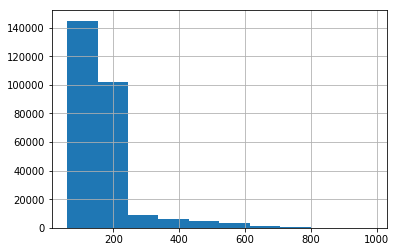

In [28]:
lens.hist();

In [29]:
data_req = data_req.dropna()

In [30]:
len(data_req)

270920

In [31]:
one_hot = pd.get_dummies(data_req.subBrand)

In [32]:
label_cols = data_req.subBrand.dropna().unique()

In [33]:
label_cols

array(['pink', 'blue', 'black', 'white', 'grey', 'violet',
       'not specified', 'multicolour', 'red', 'green', 'orange', 'beige',
       'brown', 'yellow', 'silver', 'gold', 'turquoise'], dtype=object)

In [34]:
minCount = 10
subBrand_minCount = pd.DataFrame((data_req.subBrand.value_counts() > minCount).reset_index())

In [35]:
subBrand_drop = subBrand_minCount.loc[subBrand_minCount["subBrand"] == False]

In [36]:
subBrand_drop

,index,subBrand


In [37]:
label_cols = np.setdiff1d(label_cols, subBrand_drop["index"])

In [38]:
data_req = pd.concat([data_req, one_hot], axis=1)

In [39]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [40]:
description = "description"

In [41]:
data_req = data_req.drop(subBrand_drop["index"], axis = 1)

In [42]:
np.random.seed(123)
data_req_sample = data_req.sample(frac=0.7)

In [43]:
train = data_req.loc[data_req.index.isin(data_req_sample.index)]
test = data_req.loc[~data_req.index.isin(data_req_sample.index)]

In [44]:
test_subBrand = test.subBrand

In [45]:
#test_subBrand

In [46]:
train = train.drop("subBrand", axis = 1)
test = test.drop("subBrand", axis = 1)

In [47]:
# token_dict = {}
# stemmer = PorterStemmer()

# def stem_tokens(tokens, stemmer):
#     stemmed = []
#     for item in tokens:
#         stemmed.append(stemmer.stem(item))
#     return stemmed

# def tokenize(text):
#     tokens = nltk.word_tokenize(text)
#     stems = stem_tokens(tokens, stemmer)
#     return stems

In [48]:
# from stop_words import get_stop_words
# stop_words_english = get_stop_words('english')
# stop_words_german = get_stop_words('german')

In [49]:
#stop_words_english.append(stop_words_german)

In [50]:
# stop_words_english = sorted(set(map(tuple, stop_words_english)), reverse=True)

In [51]:
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1)
trn_term_doc = vec.fit_transform(train[description])
test_term_doc = vec.transform(test[description])

In [52]:
trn_term_doc, test_term_doc

(<189644x139806 sparse matrix of type '<class 'numpy.float64'>'
 	with 11301232 stored elements in Compressed Sparse Row format>,
 <81276x139806 sparse matrix of type '<class 'numpy.float64'>'
 	with 4768104 stored elements in Compressed Sparse Row format>)

In [53]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [54]:
x = trn_term_doc
test_x = test_term_doc

In [55]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
preds = np.zeros((len(test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit beige
fit black
fit blue
fit brown
fit gold
fit green
fit grey
fit multicolour
fit not specified
fit orange
fit pink
fit red
fit silver
fit turquoise
fit violet
fit white
fit yellow


In [58]:
preds.shape

(81276, 17)

In [59]:
predictions = pd.DataFrame(preds, columns = label_cols)

In [60]:
test.index = np.arange(0, len(test))
test_subBrand.index = np.arange(0, len(test))

In [61]:
len(test)

81276

In [62]:
submid = pd.DataFrame({'description': test["description"]})
submission = pd.concat([submid, pd.DataFrame(preds, columns = label_cols)], axis=1)

In [63]:
submission.head()

,description,beige,black,blue,brown,gold,green,grey,multicolour,not specified,orange,pink,red,silver,turquoise,violet,white,yellow
0,nike usa nike cortez big kids' shoe http://st...,0.000388,0.007578,0.001886,0.000333,0.000067,0.000452,0.219433,0.000206,0.002194,0.000322,0.000518,0.001949,0.000471,0.000025,0.000470,0.964632,0.000122
1,nike germany nike performance low-cut socken f...,0.000366,0.105118,0.013828,0.000886,0.000094,0.004437,0.076708,0.003471,0.006090,0.000870,0.001796,0.003833,0.000107,0.000028,0.001314,0.704569,0.000687
2,nike usa nike jr. tiempo legend vi tf kids' tu...,0.000431,0.045053,0.012818,0.000540,0.000094,0.003636,0.024745,0.001549,0.012122,0.000585,0.001423,0.911084,0.000888,0.000017,0.002375,0.037039,0.002992
3,nike usa nike mercurial victory v tf kids' tur...,0.000410,0.018495,0.027821,0.000610,0.000106,0.053855,0.016951,0.001601,0.048208,0.000671,0.634986,0.024557,0.001533,0.000280,0.004387,0.056857,0.001428
4,nike usa nike jr. mercurial victory v ic kids'...,0.000491,0.018492,0.028870,0.000498,0.000087,0.026790,0.018934,0.000820,0.041323,0.002516,0.575233,0.026291,0.000425,0.000564,0.002751,0.018737,0.000312


In [64]:
final_pred = pd.concat([submission, test_subBrand.str.lower()],axis = 1)

In [65]:
test_subBrand.str.lower().value_counts()

black            24275
blue             13119
white             9962
grey              9480
red               4991
not specified     3706
green             3538
pink              2442
multicolour       2274
violet            1751
orange            1480
brown             1202
yellow            1186
beige              856
silver             543
gold               351
turquoise          120
Name: subBrand, dtype: int64

In [66]:
data["COLOUR GROUP"].value_counts()

black            81845
blue             43937
white            32687
grey             31105
red              16590
Not Specified    12597
green            11741
pink              8186
multicolour       7550
violet            5758
orange            4880
brown             4040
yellow            3908
beige             3092
silver            1640
gold              1272
turquoise          337
Name: COLOUR GROUP, dtype: int64

In [67]:
final_pred["Predictions"] = final_pred[label_cols].idxmax(axis = 1)

In [68]:
from mlxtend.evaluate import confusion_matrix

y_target =    final_pred.subBrand
y_predicted = final_pred.Predictions

cm = confusion_matrix(y_target=y_target, 
                      y_predicted=y_predicted, 
                      binary=False)

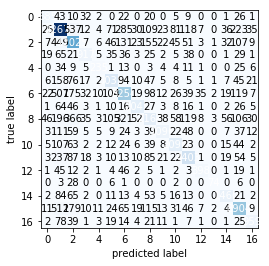

In [69]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [70]:
print(f'Accuracy Score : {accuracy_score(final_pred.subBrand, final_pred.Predictions)}')
print(f'F1 Score: {f1_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')
print(f'Precision: {precision_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')
print(f'Recall: {recall_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')

Accuracy Score : 0.8787711009400069
F1 Score: 0.8288454534888694
Precision: 0.8603797267474045
Recall: 0.8035087124924662


In [71]:
final_pred.to_csv("final_output_colour.csv", index_label=False, index=False)

In [83]:
len(final_pred)

20860

In [51]:
#test_subBrand

In [52]:
len(submission)

15062

In [54]:
#final_pred.isnull().sum()